In [1]:
import warnings
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
warnings.filterwarnings('ignore')
House_Sub=pd.read_csv('Ames Real Estate Data.csv')
House_Main=pd.read_csv('Ames_HousePrice.csv',index_col=0)

In [3]:
House_Main['PoolQC'].isnull().sum()/len(House_Main['PoolQC'])

0.9965116279069768

In [4]:
House_Main.describe(include='all')

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2580,2118.000000,2580.000000,2580,168,2580,...,2580.000000,2580.000000,9,525,97,2580.000000,2580.000000,2580.000000,2580,2580
unique,NaN,NaN,NaN,NaN,7,NaN,NaN,2,2,4,...,NaN,NaN,4,4,4,NaN,NaN,NaN,10,6
top,NaN,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,...,NaN,NaN,TA,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,NaN,NaN,2008,NaN,NaN,2570,105,1641,...,NaN,NaN,3,301,88,NaN,NaN,NaN,2392,2414
mean,7.148300e+08,1486.039922,178059.623256,57.691860,NaN,68.516053,10120.153488,NaN,NaN,NaN,...,16.200388,1.662016,NaN,NaN,NaN,48.731395,6.150775,2007.838372,NaN,NaN
std,1.886626e+08,488.650181,75031.089374,42.802105,NaN,22.835831,8126.937892,NaN,NaN,NaN,...,56.824783,30.339396,NaN,NaN,NaN,498.725058,2.670647,1.312333,NaN,NaN
min,5.263011e+08,334.000000,12789.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,5.313630e+08,1112.000000,129975.000000,20.000000,NaN,57.000000,7406.750000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,5.354546e+08,1436.000000,159900.000000,50.000000,NaN,68.000000,9391.000000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,9.071811e+08,1733.000000,209625.000000,70.000000,NaN,80.000000,11494.000000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


# Find Columns whose dtypes are numeric and initial cor analysis of those columns to target: SalePrice

In [5]:
#The target dependent varibale for this case is SalePrice column in House_Main table. In order to do some initial analysis, 
#we find columns that are of numeric type first.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
House_Main_Num=House_Main.select_dtypes(include=numerics)

In [6]:
#PID is not useful as it's working as an ID index, we drop that column
House_Main_Num=House_Main_Num.drop(['PID'],axis=1)

In [7]:
#Do the correlation analysis of the numeric variables

#set the display of output table/dataframe to max columns
pd.set_option('display.max_columns',None)

#Find the correlation of all numeric variables
cormax=round(House_Main_Num.corr(),2)

In [8]:
cormax.head()

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
GrLivArea,1.00,0.72,0.07,0.35,0.26,0.56,-0.11,0.23,0.31,0.39,0.16,-0.02,0.25,0.41,0.54,0.67,0.09,0.04,-0.05,0.64,0.45,0.54,0.13,0.81,0.46,0.27,0.50,0.48,0.25,0.32,0.00,0.01,0.10,0.06,-0.00,0.04,-0.01
SalePrice,0.72,1.00,-0.08,0.36,0.27,0.79,-0.10,0.54,0.51,0.50,0.46,0.02,0.17,0.65,0.64,0.26,-0.03,0.29,-0.03,0.53,0.29,0.15,-0.11,0.49,0.49,0.52,0.64,0.63,0.33,0.31,-0.12,0.03,0.12,0.03,-0.02,0.01,-0.00
MSSubClass,0.07,-0.08,1.00,-0.44,-0.20,0.06,-0.08,0.05,0.06,0.02,-0.07,-0.07,-0.11,-0.22,-0.26,0.31,0.01,-0.00,-0.01,0.14,0.18,-0.02,0.25,0.03,-0.05,0.11,-0.03,-0.09,-0.02,-0.01,-0.03,-0.04,-0.06,-0.01,-0.03,0.01,-0.03
LotFrontage,0.35,0.36,-0.44,1.00,0.46,0.18,-0.05,0.10,0.06,0.20,0.18,0.06,0.10,0.31,0.44,0.01,-0.01,0.11,-0.03,0.17,0.03,0.25,0.02,0.34,0.25,0.05,0.30,0.34,0.12,0.14,0.00,0.03,0.08,0.09,0.02,0.00,-0.00
LotArea,0.26,0.27,-0.20,0.46,1.00,0.08,-0.03,0.01,0.01,0.10,0.16,0.08,0.02,0.22,0.31,0.02,-0.00,0.12,0.03,0.12,0.03,0.14,-0.01,0.20,0.25,-0.02,0.18,0.20,0.16,0.08,0.02,0.02,0.05,0.05,0.04,0.01,-0.02


In [9]:
#From the above table we find the correlation of SalePrice and other independent numeric varibales
cormax=cormax['SalePrice']
cormax

GrLivArea        0.72
SalePrice        1.00
MSSubClass      -0.08
LotFrontage      0.36
LotArea          0.27
OverallQual      0.79
OverallCond     -0.10
YearBuilt        0.54
YearRemodAdd     0.51
MasVnrArea       0.50
BsmtFinSF1       0.46
BsmtFinSF2       0.02
BsmtUnfSF        0.17
TotalBsmtSF      0.65
1stFlrSF         0.64
2ndFlrSF         0.26
LowQualFinSF    -0.03
BsmtFullBath     0.29
BsmtHalfBath    -0.03
FullBath         0.53
HalfBath         0.29
BedroomAbvGr     0.15
KitchenAbvGr    -0.11
TotRmsAbvGrd     0.49
Fireplaces       0.49
GarageYrBlt      0.52
GarageCars       0.64
GarageArea       0.63
WoodDeckSF       0.33
OpenPorchSF      0.31
EnclosedPorch   -0.12
3SsnPorch        0.03
ScreenPorch      0.12
PoolArea         0.03
MiscVal         -0.02
MoSold           0.01
YrSold          -0.00
Name: SalePrice, dtype: float64

In [430]:
#Copy the cormax table and take out SalePrice, our target column
cormax_plot=cormax.copy()
cormax_plot=cormax_plot[cormax_plot.index!='SalePrice']

In [431]:
#Make a Data Frame from the updated cormax_plot table

cormax_plot=pd.DataFrame(np.concatenate((np.array(cormax_plot.index.tolist()).reshape(-1,1),
                                         np.array(cormax_plot.tolist()).reshape(-1,1)),axis=1))

In [432]:
#Change column names of the cormax_plot table
cormax_plot.columns=['Feature','Correlation between numerical features and Sales Price']

In [433]:
cormax_plot['Correlation between numerical features and Sales Price']=pd.to_numeric(cormax_plot[
    'Correlation between numerical features and Sales Price'])

In [434]:
cormax_plot.Feature.sort_values()

13         1stFlrSF
14         2ndFlrSF
30        3SsnPorch
20     BedroomAbvGr
9        BsmtFinSF1
10       BsmtFinSF2
16     BsmtFullBath
17     BsmtHalfBath
11        BsmtUnfSF
29    EnclosedPorch
23       Fireplaces
18         FullBath
26       GarageArea
25       GarageCars
24      GarageYrBlt
0         GrLivArea
19         HalfBath
21     KitchenAbvGr
3           LotArea
2       LotFrontage
15     LowQualFinSF
1        MSSubClass
8        MasVnrArea
33          MiscVal
34           MoSold
28      OpenPorchSF
5       OverallCond
4       OverallQual
32         PoolArea
31      ScreenPorch
22     TotRmsAbvGrd
12      TotalBsmtSF
27       WoodDeckSF
6         YearBuilt
7      YearRemodAdd
35           YrSold
Name: Feature, dtype: object

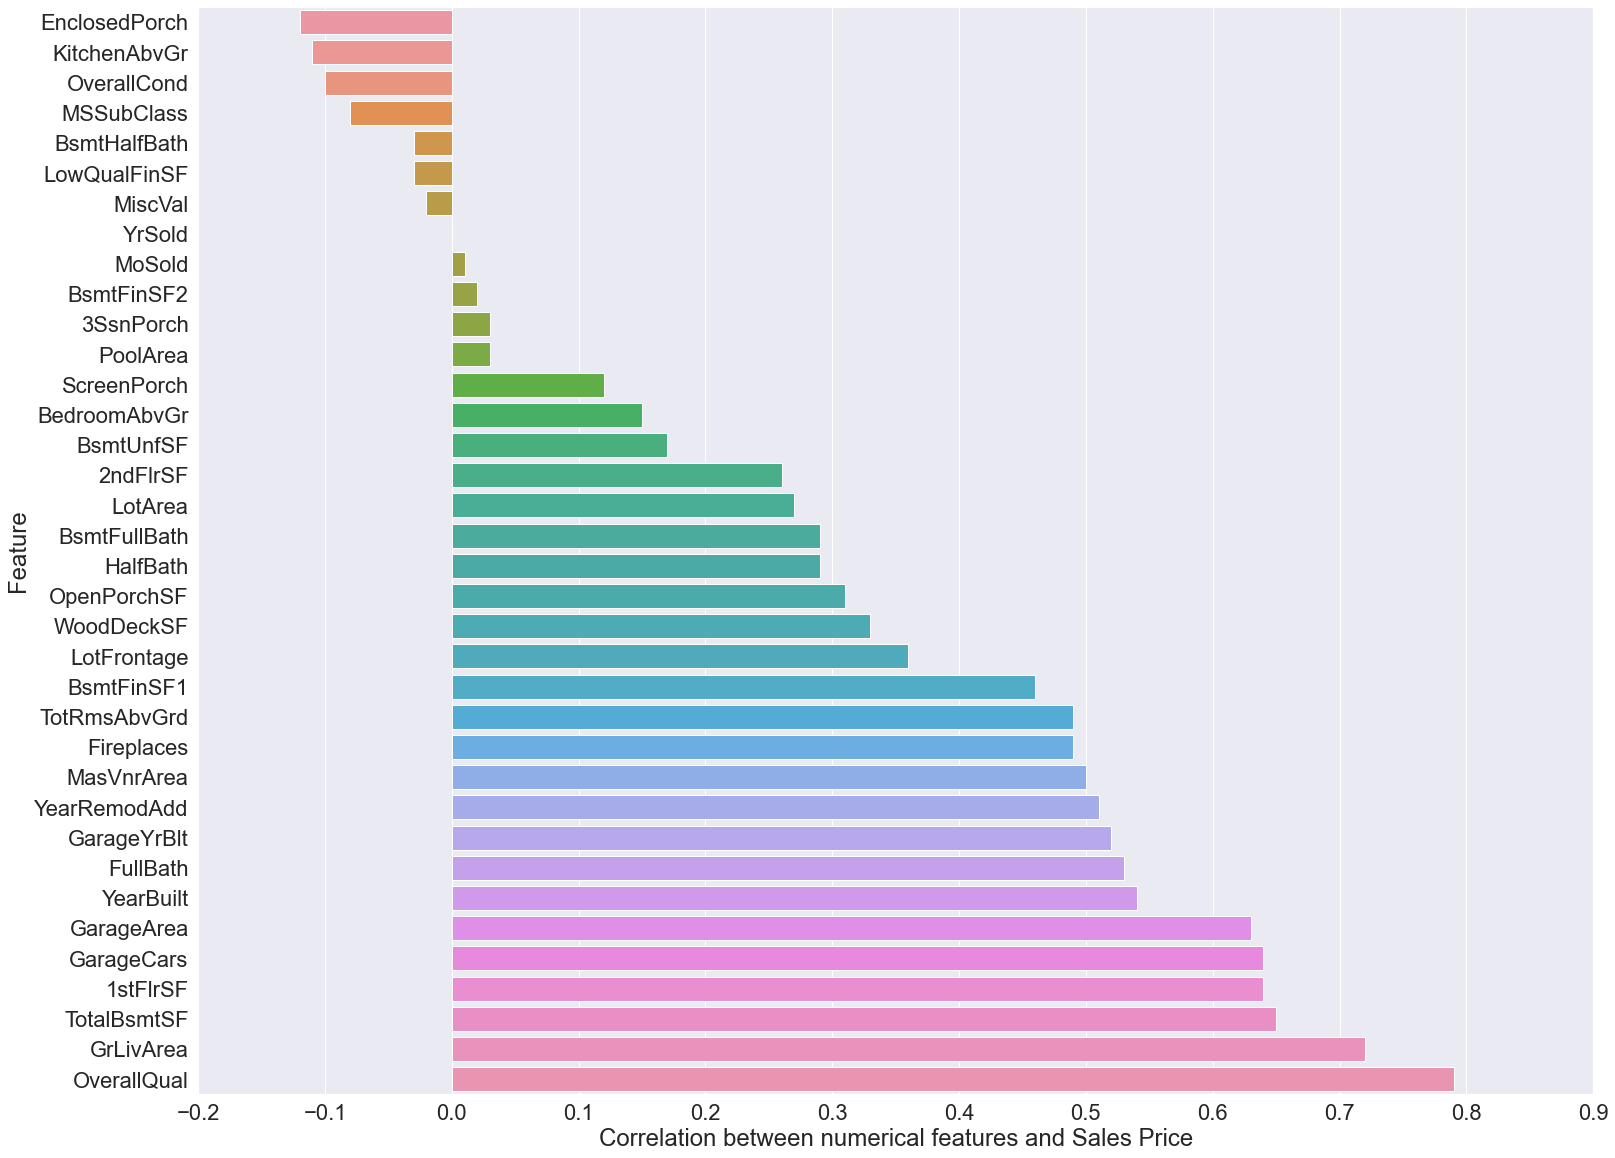

In [435]:
fig = plt.figure(figsize=(25, 20))
ax = sns.barplot(x=cormax_plot['Correlation between numerical features and Sales Price'], y=cormax_plot.Feature, data=cormax_plot,
                 order=cormax_plot.sort_values('Correlation between numerical features and Sales Price').Feature)
sns.set(font_scale=2)
ax.xaxis.set_ticks(np.arange(-0.2,1,0.1))

## Some Plots to show the relationships between variables and target

array([[<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

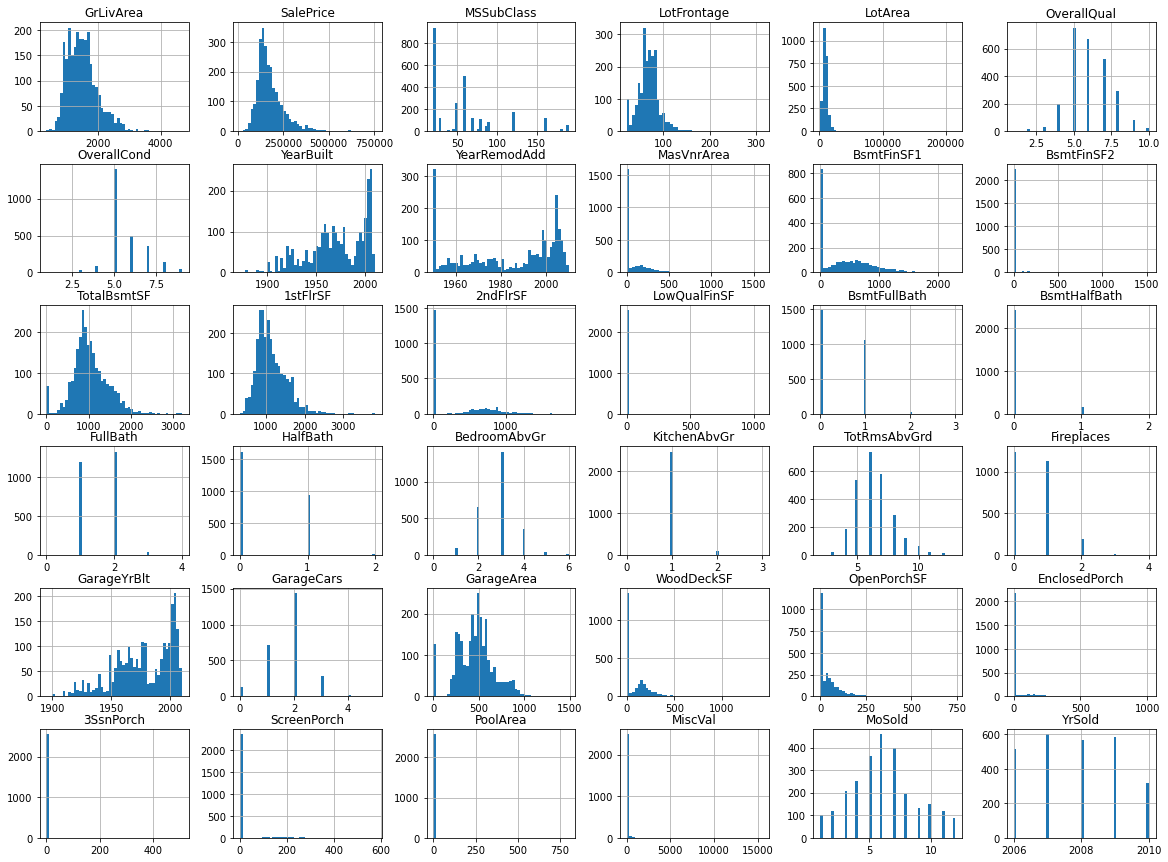

In [292]:
#Distributions of numerical variables including target
House_Main_Num.hist(bins=50,figsize=(20,15))

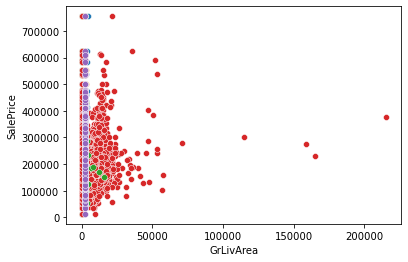

In [218]:
#House_Main_Nonnum_Init.loc[:,~House_Main_Nonnum_Init.columns.isin(Binary)]
for i in House_Main_Num.loc[:,~House_Main_Num.columns.isin(['SalePrice'])].columns:
    sns.scatterplot(x= i, y= 'SalePrice', data=House_Main_Num)

In [344]:
Sale_Type_Price=House_Main.copy()

In [345]:
#We look at SaleType, Since we will exclude this variable from our model feature selection because Sale Type data
#are gathered at Sale thus not really useful for prediction purpose.
Sale_Type_Price.SaleType.value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

In [346]:
Sale_Type_Price.SaleType=Sale_Type_Price.SaleType.apply(lambda x: 
                                         'Warranty Deed - Conventional' if x=='WD'
                                         else 'Warranty Deed - Cash' if x=='CWD' 
                                         else 'Warranty Deed - VA Loan' if x=='VWD' 
                                         else 'Home just constructed and sold' if x=='New' 
                                         else 'Court Officer Deed/Estate' if x=='COD'
                                         else 'Contract 15% Down payment regular terms' if x=='Con'
                                         else 'Contract Low Down payment and low interest' if x=='ConLw'
                                         else 'Contract Low Interest' if x=='ConLI'
                                         else 'Contract Low Down' if x=='ConLD'
                                         else 'Other')      

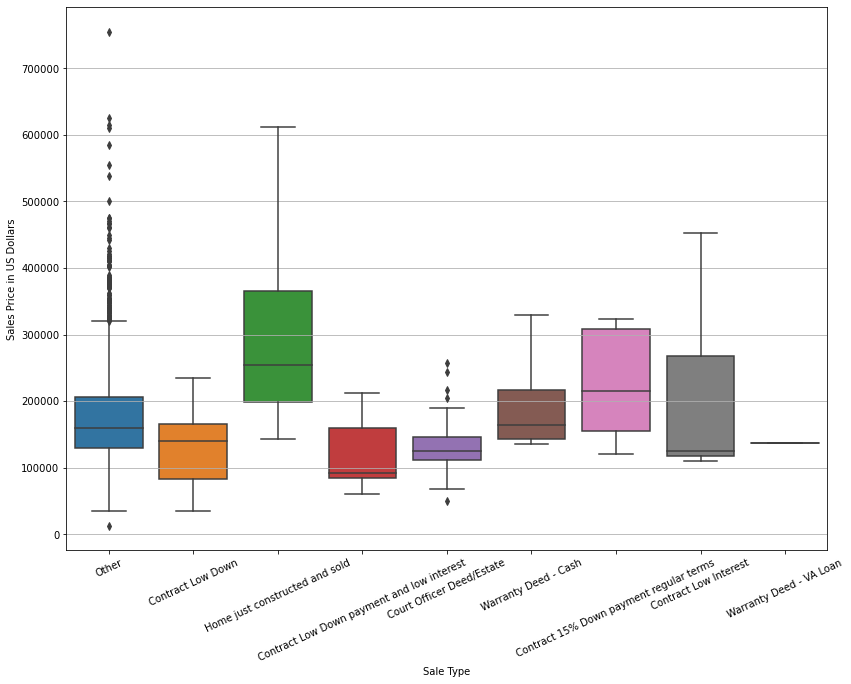

In [347]:
fig = plt.figure(figsize=(30, 10))
ax1 = plt.subplot(gs[0, 0])
g = sns.boxplot(y=Sale_Type_Price.SalePrice, x=Sale_Type_Price.SaleType, data=Sale_Type_Price, ax=ax1)
ylim = ax1.get_ylim()
plt.grid(axis='y')
g.set_xticklabels(g.get_xticklabels(),rotation = 25)
g.set(xlabel='Sale Type', ylabel='Sales Price in US Dollars')
plt.show()

In [348]:
Sale_Type_Price.Foundation=Sale_Type_Price.Foundation.apply(lambda x: 
                                         'Brick & Tile' if x=='BrkTil'
                                         else 'Cinder Block' if x=='CBlock' 
                                         else 'Poured Concrete' if x=='PConc' 
                                         else 'Slab' if x=='Slab' 
                                         else 'Stone' if x=='Stone'
                                         else 'Wood')      

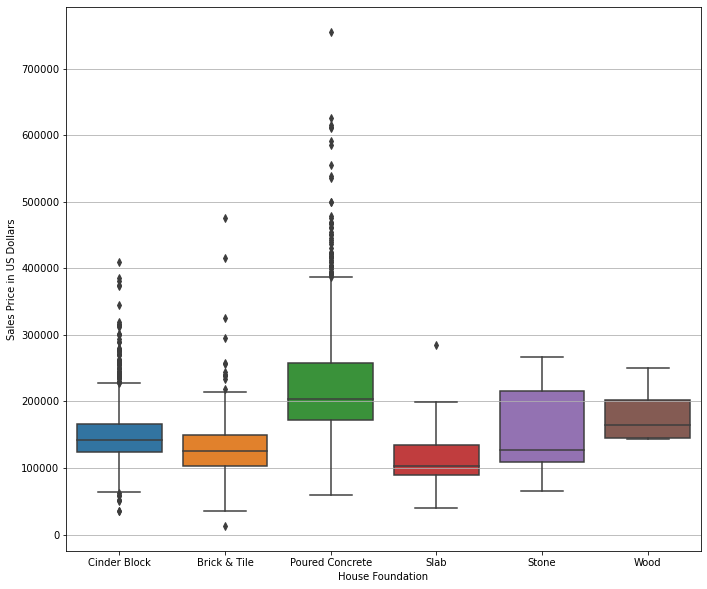

In [349]:
fig = plt.figure(figsize=(25, 10))
ax1 = plt.subplot(gs[0, 0])
g = sns.boxplot(y=Sale_Type_Price.SalePrice, x=Sale_Type_Price.Foundation, data=Sale_Type_Price, ax=ax1)
ylim = ax1.get_ylim()
plt.grid(axis='y')
g.set(xlabel='House Foundation', ylabel='Sales Price in US Dollars')
#plt.legend(labels=['Cinder Block','Brick & Tile','Poured Contrete','Slab','Stone','Wood'])
plt.show()

In [10]:
#We sort the correlation from highest to lowest
np.abs(cormax).sort_values(ascending=False)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.72
TotalBsmtSF      0.65
1stFlrSF         0.64
GarageCars       0.64
GarageArea       0.63
YearBuilt        0.54
FullBath         0.53
GarageYrBlt      0.52
YearRemodAdd     0.51
MasVnrArea       0.50
Fireplaces       0.49
TotRmsAbvGrd     0.49
BsmtFinSF1       0.46
LotFrontage      0.36
WoodDeckSF       0.33
OpenPorchSF      0.31
BsmtFullBath     0.29
HalfBath         0.29
LotArea          0.27
2ndFlrSF         0.26
BsmtUnfSF        0.17
BedroomAbvGr     0.15
ScreenPorch      0.12
EnclosedPorch    0.12
KitchenAbvGr     0.11
OverallCond      0.10
MSSubClass       0.08
3SsnPorch        0.03
PoolArea         0.03
BsmtHalfBath     0.03
LowQualFinSF     0.03
BsmtFinSF2       0.02
MiscVal          0.02
MoSold           0.01
YrSold           0.00
Name: SalePrice, dtype: float64

# Find columns whose dtypes are non-numeric and label-encode or dummify variables in those columns

In [11]:
#Get all the columns whose dtypes are not numeric, i.e. object
House_Main_Nonnum=House_Main.select_dtypes(exclude=numerics)
House_Main_Nonnum.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [12]:
House_Main_Nonnum.shape[1] #We know there are 43 variables whose dtypes are 'object'

43

In [13]:
House_Main_Nonnum.isnull().sum(axis=0) #From the list below, we know some object variables have null-type values.

MSZoning            0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinType2       70
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu      1241
GarageType        127
GarageFinish      129
GarageQual        129
GarageCond        129
PavedDrive          0
PoolQC           2571
Fence            2055
MiscFeature      2483
SaleType            0
SaleCondition       0
dtype: int64

In [14]:
#Subset the House_Main_Nonnum columns that do not have nan values
House_Main_Nonnum_Init=House_Main_Nonnum[House_Main_Nonnum.columns[~House_Main_Nonnum.isnull().any()]]

House_Main_Nonnum_Init.isnull().sum(axis=0)

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Functional       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [15]:
#We do a value counts here to make sure words are not used to represent numbers (like 'One', 'Two', ...) If there are we 
#could just replace with integers. (The result shows none)
House_Main_Nonnum_Init.value_counts

<bound method DataFrame.value_counts of     MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
1         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
2         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
3    C (all)   Pave      Reg         Lvl    AllPub    Inside       Gtl   
4         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
5         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
..       ...    ...      ...         ...       ...       ...       ...   
759       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
760       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
761       RH   Pave      Reg         HLS    AllPub    Inside       Gtl   
762       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
763       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   

    Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle Ro

In [16]:
#Making sure there's no empty cells in the columns of House_Main_Nonnum_Init
for col in House_Main_Nonnum_Init:
    print(col,(House_Main_Nonnum_Init[col].values=='').sum())

MSZoning 0
Street 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
ExterQual 0
ExterCond 0
Foundation 0
Heating 0
HeatingQC 0
CentralAir 0
KitchenQual 0
Functional 0
PavedDrive 0
SaleType 0
SaleCondition 0


In [17]:
for col in House_Main_Nonnum_Init:
    print(col,House_Main_Nonnum_Init[col].unique())

MSZoning ['RL' 'C (all)' 'RM' 'FV' 'RH' 'I (all)' 'A (agr)']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR3' 'IR2']
LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities ['AllPub' 'NoSewr']
LotConfig ['Corner' 'Inside' 'FR2' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['SWISU' 'Edwards' 'IDOTRR' 'OldTown' 'NWAmes' 'Blmngtn' 'Mitchel'
 'NridgHt' 'NAmes' 'CollgCr' 'SawyerW' 'MeadowV' 'BrDale' 'Gilbert'
 'Timber' 'Somerst' 'BrkSide' 'NoRidge' 'Sawyer' 'Crawfor' 'Greens'
 'ClearCr' 'GrnHill' 'StoneBr' 'Veenker' 'NPkVill' 'Blueste' 'Landmrk']
Condition1 ['Norm' 'RRAn' 'PosN' 'Artery' 'RRAe' 'Feedr' 'PosA' 'RRNn' 'RRNe']
Condition2 ['Norm' 'PosN' 'Feedr' 'Artery' 'PosA' 'RRNn' 'RRAn' 'RRAe']
BldgType ['1Fam' 'TwnhsE' '2fmCon' 'Twnhs' 'Duplex']
HouseStyle ['1Story' '2Story' 'SFoyer' 'SLvl' '1.5Fin' '2.5Unf' '1.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Mansard' 'Gambrel' 'Flat' 'Shed']
RoofMatl ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl' 'Metal' 'Roll' 'Membran']
Exterior1st ['Wd Sdn

In [18]:
for col in House_Main_Nonnum_Init:
    print(House_Main_Nonnum_Init[col].value_counts())

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64
Pave    2570
Grvl      10
Name: Street, dtype: int64
Reg    1641
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64
Lvl    2337
HLS      96
Bnk      95
Low      52
Name: LandContour, dtype: int64
AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64
Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64
Gtl    2458
Mod     109
Sev      13
Name: LandSlope, dtype: int64
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk 

In [19]:
#From the above tables we could handle different columns as follows:
# MSZoning: Group C, I, A into 'non-residential'
# HeatingQC, KitchenQual: Group Fa, Po into 'Ba' as 'Below Average'
Drop=['Street', 'Utilities','Condition2', 'RoofMatl', 'SaleType', 'SaleCondition']
# Keep: LandContour, BldgType, ExterQual, ExterCond, Foundation, PavedDrive
# LotConfig: Group FR2 and FR3 into 'Frontage'
# Convert to binary: LotShape, LandSlope, Condition1, Heating, CentralAir, Functional
# Use .75 Threshold: Neiborhood, Exterior1st, Exterior2nd
# Use .90 Threshold: HouseStyle, RoofStyle

In [20]:
House_Main_Nonnum_Init.shape

(2580, 27)

In [21]:
#Dropping columns
House_Main_Nonnum_Init=House_Main_Nonnum_Init.drop(Drop,axis=1)
House_Main_Nonnum_Init.shape

(2580, 21)

In [22]:
#MSZoning: Group C, I, A into 'non-residential'
#House_Main_Nonnum_Init['MSZoning']=
House_Main_Nonnum_Init['MSZoning']=House_Main_Nonnum_Init['MSZoning'].apply(lambda x: 
                                         'Non-residential' if x=='C (all)'
                                         else 'Non-residential' if x=='I (all)' 
                                         else 'Non-residential' if x=='A (agr)' 
                                         else 'RL' if x=='RL' 
                                         else 'RM' if x=='RM'
                                         else 'FV' if x=='FV'
                                         else 'RH')           

In [23]:
# HeatingQC, KitchenQual: Group Fa, Po into 'Ba' as 'Below Average'
House_Main_Nonnum_Init['HeatingQC']=House_Main_Nonnum_Init['HeatingQC'].str.replace('Fa','Ba').str.replace('Po','Ba')

In [24]:
# LotConfig: Group FR2 and FR3 into 'Frontage'
for i in range(len(House_Main_Nonnum_Init['LotConfig'])):
    if (House_Main_Nonnum_Init['LotConfig'].iloc[i] == 'FR2') or (House_Main_Nonnum_Init['LotConfig'].iloc[i] == 'FR3'):
        House_Main_Nonnum_Init['LotConfig'].iloc[i]='Frontage'

In [25]:
# Convert to binary: LotShape, LandSlope, Condition1, Heating, CentralAir, Functional

#LotShape:
House_Main_Nonnum_Init['LotShape']=House_Main_Nonnum_Init['LotShape'].map(lambda x: 1 if x=='Reg' else 0)
House_Main_Nonnum_Init['LotShape'].value_counts()

1    1641
0     939
Name: LotShape, dtype: int64

In [26]:
#LandSlope:
House_Main_Nonnum_Init['LandSlope']=House_Main_Nonnum_Init['LandSlope'].map(lambda x: 1 if x=='Gtl' else 0)
House_Main_Nonnum_Init['LandSlope'].value_counts()

1    2458
0     122
Name: LandSlope, dtype: int64

In [27]:
#Condition1
House_Main_Nonnum_Init['Condition1']=House_Main_Nonnum_Init['Condition1'].map(lambda x: 1 if x=='Norm' else 0)
House_Main_Nonnum_Init['Condition1'].value_counts()

1    2228
0     352
Name: Condition1, dtype: int64

In [28]:
#Heating
House_Main_Nonnum_Init['Heating']=House_Main_Nonnum_Init['Heating'].map(lambda x: 1 if ((x=='GasA') or (x=='GasW')) else 0)
House_Main_Nonnum_Init['Heating'].value_counts()

1    2565
0      15
Name: Heating, dtype: int64

In [29]:
#CentralAir
House_Main_Nonnum_Init['CentralAir']=House_Main_Nonnum_Init['CentralAir'].map(lambda x: 1 if x=='Y' else 0)
House_Main_Nonnum_Init['CentralAir'].value_counts()

1    2417
0     163
Name: CentralAir, dtype: int64

In [30]:
#Functional
House_Main_Nonnum_Init['Functional']=House_Main_Nonnum_Init['Functional'].map(lambda x: 1 if x=='Typ' else 0)
House_Main_Nonnum_Init['Functional'].value_counts()

1    2399
0     181
Name: Functional, dtype: int64

In [31]:
#Use .75 Threshold: Neiborhood, Exterior1st, Exterior2nd

def cumulatively_categorise(column,threshold=0.75):
        #Find the threshold value using the percentage and number of observations in the column
        threshold_value=int(threshold*len(column))
        #Initialise an empty list for our new minimised categories
        categories_list=[]
        #Initialise a variable to calculate the sum of frequencies
        s=0
        #Create a counter dictionary of the form unique_value: frequency
        counts=Counter(column)

        #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
        for i,j in counts.most_common():
        #Add the frequency to the global sum
          s+=dict(counts)[i]
        #Append the category name to the list
          categories_list.append(i)
        #Check if the global sum has reached the threshold value, if so break the loop
          if s>=threshold_value:
                break
        
        #Replace all instances not in our new categories by Other  
        column=column.apply(lambda x: x if x in categories_list else 'Other')
        
        return column

In [32]:
#Call the function with a default threshold of 75%

Treshold_75=['Neighborhood','Exterior1st', 'Exterior2nd']
for col in Treshold_75:
    House_Main_Nonnum_Init[col]=cumulatively_categorise(House_Main_Nonnum_Init[col])
print(House_Main_Nonnum_Init['Neighborhood'].value_counts())
print(House_Main_Nonnum_Init['Exterior1st'].value_counts())
print(House_Main_Nonnum_Init['Exterior2nd'].value_counts())

Other      567
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Name: Neighborhood, dtype: int64
VinylSd    868
Other      504
HdBoard    416
MetalSd    407
Wd Sdng    385
Name: Exterior1st, dtype: int64
VinylSd    856
Other      571
MetalSd    404
HdBoard    380
Wd Sdng    369
Name: Exterior2nd, dtype: int64


In [351]:
House_Main.HouseStyle.value_counts()

1Story    1288
2Story     773
1.5Fin     284
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: HouseStyle, dtype: int64

In [33]:
#Call the function with a default threshold of 90%

Treshold_90=['HouseStyle', 'RoofStyle']
for col in Treshold_90:
    House_Main_Nonnum_Init[col]=cumulatively_categorise(House_Main_Nonnum_Init[col],threshold=0.90)
print(House_Main_Nonnum_Init['HouseStyle'].value_counts())
print(House_Main_Nonnum_Init['RoofStyle'].value_counts())

1Story    1288
2Story     773
1.5Fin     284
Other      235
Name: HouseStyle, dtype: int64
Gable    2059
Hip       473
Other      48
Name: RoofStyle, dtype: int64


In [34]:
#Dummy-Encoding Process:

Binary=['LotShape', 'LandSlope', 'Condition1', 'Heating', 'CentralAir', 'Functional']
Dummy=pd.get_dummies(House_Main_Nonnum_Init.loc[:,~House_Main_Nonnum_Init.columns.isin(Binary)],drop_first=True)
House_Main_Nonnum_Init=House_Main_Nonnum_Init[Binary]
House_Main_Nonnum_Init=pd.concat([House_Main_Nonnum_Init,Dummy],axis=1)
House_Main_Nonnum_Init.columns

Index(['LotShape', 'LandSlope', 'Condition1', 'Heating', 'CentralAir',
       'Functional', 'MSZoning_Non-residential', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_Frontage', 'LotConfig_Inside',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Other',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_Other', 'RoofStyle_Hip', 'RoofStyle_Other',
       'Exterior1st_MetalSd', 'Exterior1st_Other', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdn

In [35]:
House_Main_Nonnum.isnull().sum(axis=0).sort_values(ascending=False)

PoolQC           2571
MiscFeature      2483
Alley            2412
Fence            2055
FireplaceQu      1241
GarageCond        129
GarageQual        129
GarageFinish      129
GarageType        127
BsmtExposure       71
BsmtFinType2       70
BsmtFinType1       69
BsmtQual           69
BsmtCond           69
MasVnrType         14
Electrical          1
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [36]:
#Create another table that are categorical variables but contain NaN values

#Cat_Drop=['PoolQC','Alley','FireplaceQu','Fence','MiscFeature']

In [37]:
#Dropping some numerical/Categorical columns because they have too many NaN values and NaN doesn't mean 
#anything in those columns:
Num_Drop=['BsmtUnfSF']
House_Main_Num=House_Main_Num.drop(Num_Drop,axis=1)

In [38]:
#Merge tables to create a ML table
ML_df=pd.concat([House_Main_Nonnum_Init,House_Main_Num],axis=1)

In [39]:
#In order to build model, we create X-independent variables table, and y-dependent variable table
ML_df_x=ML_df.loc[:,~ML_df.columns.isin(['SalePrice'])]
ML_df_y=ML_df['SalePrice']

# Time to build Pipeline for our model!

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [41]:
#Now we find all NaN values before we build our model
NaN=[]
for col in ML_df_x.columns:
    if ML_df_x[col].isnull().sum(axis=0)>0:
        NaN.append(col)

In [42]:
for i in NaN:
    print(i,ML_df_x[i].values)

LotFrontage [nan 42. 60. ... 82. nan 80.]
MasVnrArea [  0. 149.   0. ...   0. 144. 125.]
BsmtFinSF1 [238. 552. 737. ... 284. 841. 380.]
BsmtFinSF2 [  0. 393.   0. ...   0.   0.   0.]
TotalBsmtSF [ 856. 1049.  837. ... 1001.  985.  777.]
BsmtFullBath [1. 1. 0. ... 0. 1. 0.]
BsmtHalfBath [0. 0. 0. ... 0. 0. 0.]
GarageYrBlt [1939. 1984. 1930. ... 1949. 2000. 1993.]
GarageCars [2. 1. 1. ... 3. 2. 2.]
GarageArea [399. 266. 216. ... 871. 486. 471.]


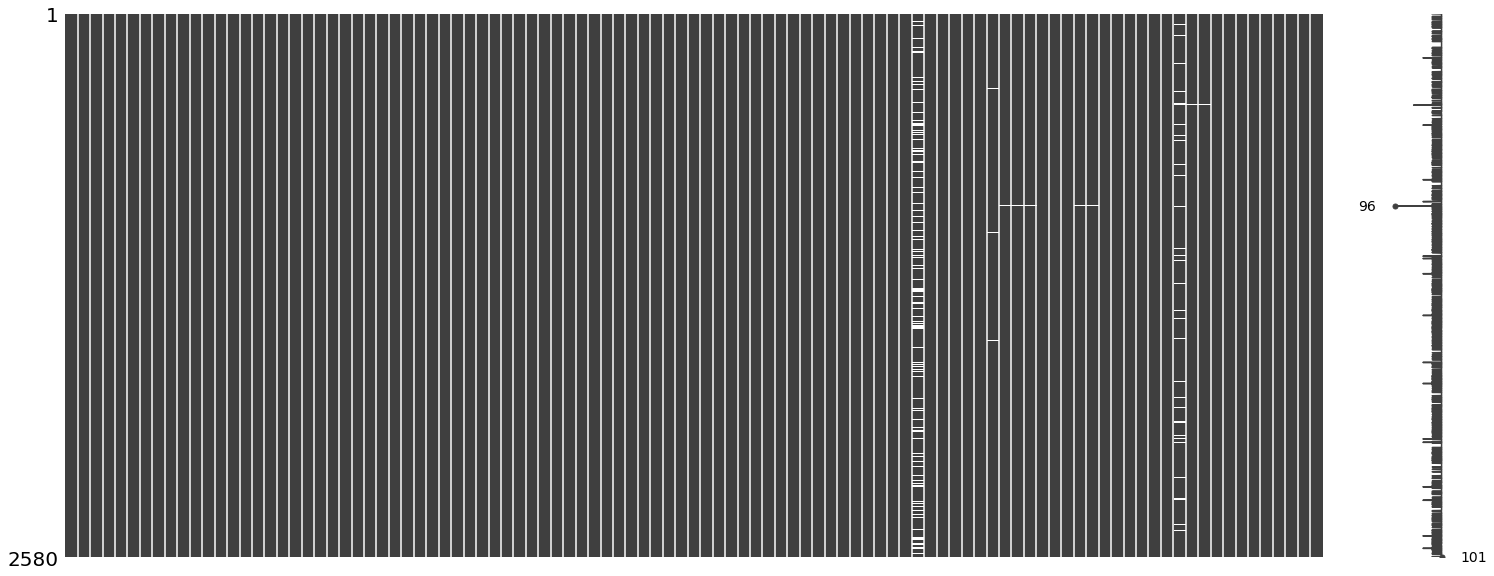

In [43]:
import missingno as msno
msno.matrix(ML_df_x);

<AxesSubplot:>

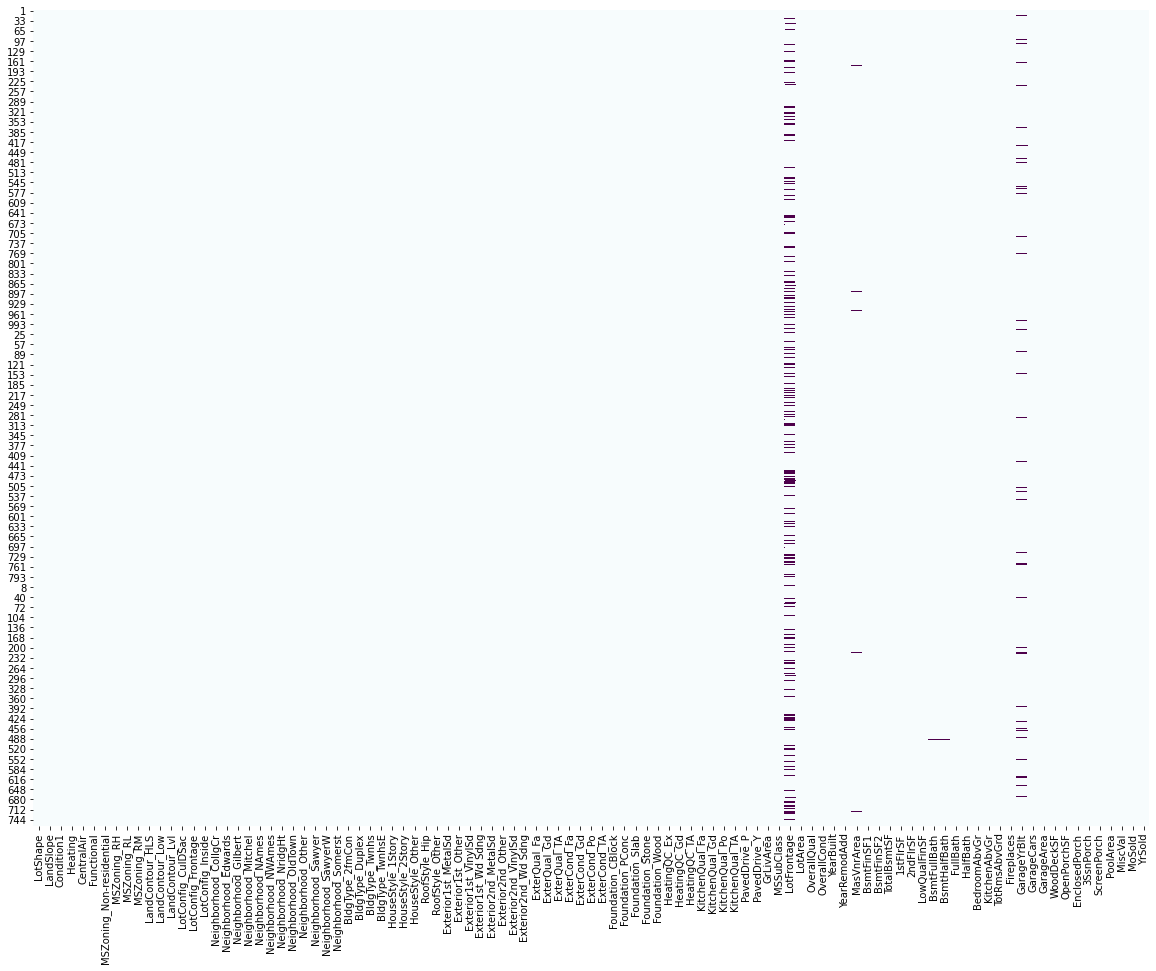

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(ML_df_x.isna(),cmap="BuPu",cbar=False)

In [45]:
ML_df_x.isnull().sum().sum(), ML_df_x.isnull().mean().sort_values(ascending=False).head(10)

(614,
 LotFrontage     0.179070
 GarageYrBlt     0.050000
 MasVnrArea      0.005426
 BsmtFullBath    0.000775
 BsmtHalfBath    0.000775
 BsmtFinSF2      0.000388
 BsmtFinSF1      0.000388
 TotalBsmtSF     0.000388
 GarageArea      0.000388
 GarageCars      0.000388
 dtype: float64)

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [47]:
#We use two methods on handling the null values of numerical independent variables:

#1 We fill the NaN values with 0 when 0 makes sense for the independen variable:
fillna_zero=['LotFrontage','MasVnrArea','BsmtFullBath','BsmtHalfBath','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF','GarageArea','GarageCars','GarageYrBlt']

ML_df_x[fillna_zero]=ML_df_x[fillna_zero].fillna(0)


In [48]:
#Now we find the remaining columns with NaN values:
ML_df_x.isnull().mean().sort_values(ascending=False).head(10)

LotShape        0.0
PavedDrive_P    0.0
MasVnrArea      0.0
YearRemodAdd    0.0
YearBuilt       0.0
OverallCond     0.0
OverallQual     0.0
LotArea         0.0
LotFrontage     0.0
MSSubClass      0.0
dtype: float64

In [49]:
#2  We use the following way to impute the missing values for GarageYrBlt(Not used for model, as we find fill NaN with
#0 will be more appropriate):

# Impute=IterativeImputer(
#     estimator=ExtraTreesRegressor(),max_iter=15,random_state=42
# )

# ML_df_x.loc[:,:]=Impute.fit_transform(ML_df_x)

#Another way to impute using datawig:
#Import datawig
# df_train, df_test = datawig.utils.random_split(ML_df_x)

# #Initialize a SimpleImputer model
# imputer = datawig.SimpleImputer(
#     input_columns=ML_df_x.loc[:,~ML_df_x.columns.isin(NaN)].columns.tolist(), # column(s) containing information about the column we want to impute
#     output_column= NaN, # the columns we'd like to impute values for
#     output_path = 'imputer_model' # stores model data and metrics
#     )

# #Fit an imputer model on the train data
# imputer.fit(train_df=df_train, num_epochs=50)

# #Impute missing values and return original dataframe with predictions
# imputed = imputer.predict(df_test)

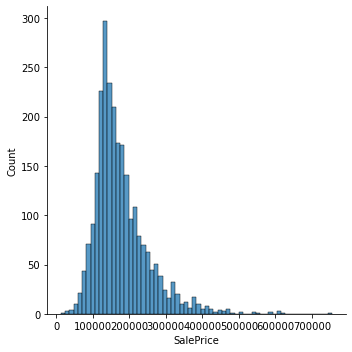

In [50]:
#Now we look at the distribution of our target
sns.displot(ML_df_y)

In [51]:
# We can see the dependent variable is skewed, so we use 𝑙𝑜𝑔(𝑝𝑟𝑖𝑐𝑒)∼𝛽𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑓𝑒𝑎𝑡𝑢𝑟𝑒+𝛽0+𝜖 , 
#this would imply  𝑝𝑟𝑖𝑐𝑒∼𝑒𝛽𝑓𝑒𝑎𝑡𝑢𝑟𝑒⋅𝑓𝑒𝑎𝑡𝑢𝑟𝑒⋅𝑒𝛽0+𝜖 , which treats the feature as an optional attribute of the house
ML_df_y=np.log(ML_df_y)
# ML_df_y=ML_df_y.astype(int)
# from sklearn.utils.multiclass import type_of_target
# type_of_target(ML_df_y)

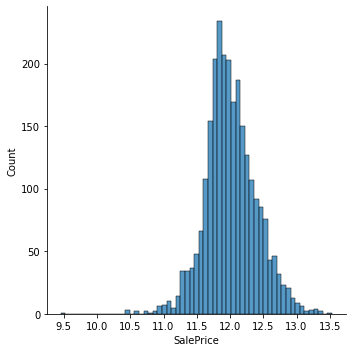

In [52]:
sns.displot(ML_df_y) #Now the sale prices of houses are normally distributed. We can start building our model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [72]:
np.logspace()

array([1.00000000e-10, 1.59731228e-10, 2.55140652e-10, 4.07539297e-10,
       6.50967523e-10, 1.03979842e-09, 1.66088278e-09, 2.65294846e-09,
       4.23758716e-09, 6.76875001e-09, 1.08118075e-08, 1.72698329e-08,
       2.75853162e-08, 4.40623643e-08, 7.03813555e-08, 1.12421004e-07,
       1.79571449e-07, 2.86831681e-07, 4.58159767e-07, 7.31824222e-07,
       1.16895182e-06, 1.86718109e-06, 2.98247129e-06, 4.76393801e-06,
       7.60949669e-06, 1.21547425e-05, 1.94149195e-05, 3.10116893e-05,
       4.95353521e-05, 7.91234262e-05, 1.26384820e-04, 2.01876025e-04,
       3.22459055e-04, 5.15067808e-04, 8.22724134e-04, 1.31414736e-03,
       2.09910372e-03, 3.35292415e-03, 5.35566692e-03, 8.55467254e-03,
       1.36644835e-02, 2.18264473e-02, 3.48636523e-02, 5.56881399e-02,
       8.89513497e-02, 1.42083083e-01, 2.26951054e-01, 3.62511705e-01,
       5.79044398e-01, 9.24914728e-01, 1.47737765e+00, 2.35983347e+00,
       3.76939098e+00, 6.02089449e+00, 9.61724871e+00, 1.53617495e+01,
      

In [71]:
#Pipeline Model
X_train, X_test, y_train, y_test = train_test_split(ML_df_x, ML_df_y, test_size=0.3, random_state=42)
N_alpha = 60
N_rho   = 20
alphaRange = np.logspace(-10, 2, N_alpha)
rhoRange   = np.linspace(0.1,1, N_rho)
elasticnet = ElasticNet()
ridge = Ridge()
pipe = Pipeline(
    [
    ("standardize", StandardScaler()),
    ("clf", elasticnet)
    ]
)

params = [
    {
    "clf":(ElasticNet(),),
    "clf__alpha": alphaRange,
    "clf__l1_ratio": rhoRange},
    {
    "clf":(Ridge(),),
    "clf__alpha": alphaRange}
]

kfold=KFold(n_splits=5)
#skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

gs = GridSearchCV(pipe, params, scoring="r2", cv=kfold)

start= time.time()
gs.fit(X_train, y_train)
print(time.time() - start)

print("The best parameters are: ", gs.best_params_)
print("The score of the training model: ", gs.score(X_train,y_train))
print("The score of the final model: ", gs.score(X_test, y_test))

683.906849861145
The best parameters are:  {'clf': Ridge(alpha=62.60516572014828), 'clf__alpha': 62.60516572014828}
The score of the training model:  0.9160713941959847
The score of the final model:  0.9262822441323615


In [69]:
# #Pipeline Model
# X_train, X_test, y_train, y_test = train_test_split(ML_df_x, ML_df_y, test_size=0.3, random_state=42)
# N_alpha = 12
# N_rho   = 10
# alphaRange = np.logspace(-10, 2, N_alpha)
# rhoRange   = np.linspace(0.1,1, N_rho)
# elasticnet = ElasticNet()
# ridge = Ridge()
# pipe = Pipeline(
#     [
#     ("standardize", StandardScaler()),
#     ("elasticnet", elasticnet)
#     ]
# )

# params = [
#     {
#     "elasticnet__alpha": alphaRange,
#     "elasticnet__l1_ratio": rhoRange},
#     {
#     "ridge__alpha": alphaRange}
# ]

# kfold=KFold(n_splits=5)
# #skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# gs = GridSearchCV(pipe, params, scoring="r2", cv=kfold)

# start= time.time()
# gs.fit(X_train, y_train)
# print(time.time() - start)

# print("The best parameters are: ", gs.best_params_)
# print("The score of the training model: ", gs.score(X_train,y_train))
# print("The score of the final model: ", gs.score(X_test, y_test))

TypeError: __init__() takes 2 positional arguments but 3 were given

In [74]:
gs.best_estimator_.named_steps["clf"].coef_ #coefficients for each of the independent variables of our model

array([-0.00496243, -0.00717788,  0.01625957, -0.00322483,  0.01869793,
        0.01343167, -0.02030238, -0.00100948,  0.01152202, -0.01726696,
        0.01327371,  0.00603899,  0.01183073,  0.00576804, -0.00272857,
       -0.00034097, -0.0059283 , -0.01945663, -0.0069032 , -0.00603799,
       -0.01705984, -0.00961901,  0.00966657, -0.01730406,  0.00168502,
       -0.0037923 , -0.00950873,  0.01500417,  0.0105781 , -0.00581184,
       -0.02004672, -0.00408505, -0.01174683, -0.00199033,  0.00438118,
        0.00029378,  0.00288392,  0.00528343,  0.00320143, -0.00016829,
       -0.01005204, -0.00044298, -0.00311874,  0.00747448,  0.01468643,
        0.00158137, -0.00265464, -0.00988334, -0.01088399,  0.00180797,
       -0.00127146,  0.00684725,  0.00382038,  0.01473361, -0.00042691,
        0.0013635 ,  0.00059692,  0.00885159,  0.00512479, -0.00560528,
       -0.00814724, -0.0151002 ,  0.00207919, -0.02438115,  0.00518697,
        0.01218753,  0.06698681, -0.01320011,  0.00386086,  0.01

In [76]:
gs.best_estimator_.named_steps["clf"].intercept_ #intercept for each of the independent variables of our model

12.00238181445389

# Visual verification of our model fitness

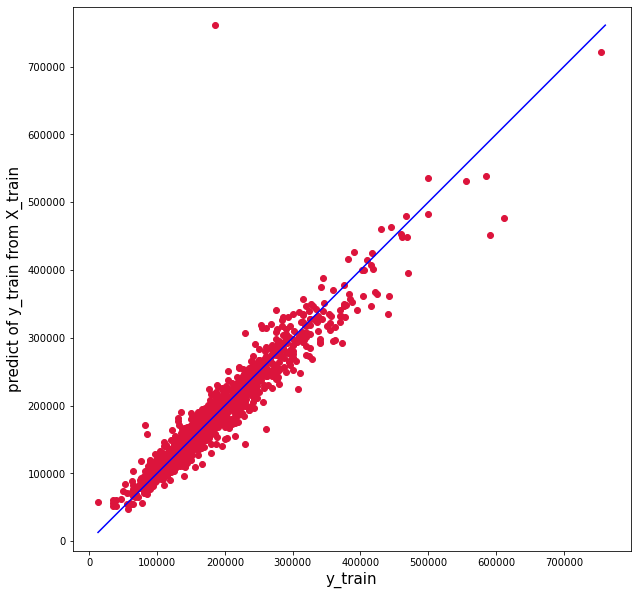

In [79]:
#y train vs predicted y from X train using our model:

plt.figure(figsize=(10,10))
plt.scatter(np.exp(y_train),np.exp(gs.predict(X_train)),c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(np.exp(gs.predict(X_train))), max(np.exp(y_train)))
p2 = min(min(np.exp(gs.predict(X_train))), min(np.exp(y_train)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_train', fontsize=15)
plt.ylabel('predict of y_train from X_train', fontsize=15)
plt.axis('equal')
plt.show()

In [160]:
#y test vs predicted y from X test using our model:

plt.figure(figsize=(10,10))
plt.scatter(np.exp(y_test),np.exp(gs.predict(X_test)),c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(np.exp(gs.predict(X_test))), max(np.exp(y_test)))
p2 = min(min(np.exp(gs.predict(X_test))), min(np.exp(y_test)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_test', fontsize=15)
plt.ylabel('predict of y_test from X_test', fontsize=15)
plt.axis('equal')
plt.show()

ValueError: X has 101 features, but StandardScaler is expecting 40 features as input.

<Figure size 720x720 with 0 Axes>

# Time to take out the non-important and re-run our model

In [111]:
#We get the coefficients of our model ran above
gs.best_estimator_.named_steps["clf"].coef_.reshape(-1,1).shape

(101, 1)

In [110]:
#We get the column names of our model as well
np.array(ML_df_x.columns).reshape(-1,1).shape

(101, 1)

In [132]:
#Since the shapes match, we can concatenate our column names and related coefficients
Feature_Coef=pd.DataFrame(
               np.concatenate((   
               np.array(ML_df_x.columns).reshape(-1,1), 
               gs.best_estimator_.named_steps["clf"].coef_.reshape(-1,1)),
               axis=1),
               columns=['Features','Coefficients']
)

In [133]:
Feature_Coef

,Features,Coefficients
0,LotShape,-0.004962
1,LandSlope,-0.007178
2,Condition1,0.01626
3,Heating,-0.003225
4,CentralAir,0.018698
...,...,...
96,ScreenPorch,0.012794
97,PoolArea,-0.003318
98,MiscVal,0.001023
99,MoSold,-0.003465


In [134]:
#Now we add another column that shows the absolute value of coefficients
Feature_Coef['Coefficients_abs']=abs(Feature_Coef.Coefficients)

In [135]:
#Sort the datafram based on Coefficient Importance and assign back to Feature_Coef
Feature_Coef=Feature_Coef.sort_values(by='Coefficients_abs',ascending=False).reset_index(drop=True)

In [149]:
#We set 1% Coefficient_abs as a threshold
Feature_Coef01=Feature_Coef[Feature_Coef.Coefficients_abs>0.01]

In [150]:
Feature_Coef01.shape[0]

40

In [151]:
#Now We get these 40 features as the features for our independent variables.
Feature_Coef01=Feature_Coef01.Features.tolist()
ML_df_x40=ML_df_x[Feature_Coef01]

In [152]:
ML_df_x40

,OverallQual,GrLivArea,1stFlrSF,OverallCond,YearBuilt,2ndFlrSF,BsmtFinSF1,TotalBsmtSF,KitchenQual_TA,GarageCars,MSZoning_Non-residential,BldgType_Twnhs,Neighborhood_Edwards,Fireplaces,CentralAir,Neighborhood_OldTown,MSZoning_RM,Neighborhood_NAmes,Condition1,YearRemodAdd,KitchenQual_Gd,Neighborhood_Somerst,BsmtFullBath,Foundation_PConc,Exterior2nd_Wd Sdng,LotArea,Functional,TotRmsAbvGrd,LandContour_HLS,MSSubClass,ScreenPorch,PavedDrive_Y,LandContour_Lvl,FullBath,HouseStyle_1Story,MSZoning_RL,ExterCond_Fa,BldgType_2fmCon,BsmtFinSF2,Exterior1st_Wd Sdng
1,6,856,856,6,1939,0,238.0,856.0,1,2.0,0,0,0,1,1,0,0,0,1,1950,0,0,1.0,0,1,7890,1,4,0,30,166,1,1,1,1,1,0,0,0.0,1
2,5,1049,1049,5,1984,0,552.0,1049.0,0,1.0,0,0,1,0,1,0,0,0,1,1984,1,0,1.0,0,0,4235,1,5,0,120,0,1,1,2,1,1,0,0,393.0,0
3,5,1001,1001,9,1930,0,737.0,837.0,0,1.0,1,0,0,0,1,0,0,0,1,2007,1,0,0.0,0,0,6060,1,5,0,30,0,0,1,1,1,0,0,0,0.0,0
4,4,1039,717,8,1900,322,0.0,405.0,1,1.0,0,0,0,0,1,1,0,0,1,2003,0,0,0.0,0,0,8146,1,6,0,70,111,0,1,1,0,1,0,0,0.0,0
5,8,1665,810,6,2001,855,643.0,810.0,0,2.0,0,0,0,0,1,0,0,0,1,2001,1,0,1.0,1,0,8400,1,6,0,60,0,1,1,2,0,1,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,6,952,952,6,1916,0,0.0,952.0,0,1.0,0,0,0,1,0,0,0,0,1,1950,0,0,0.0,0,1,8854,1,4,0,30,40,0,1,1,0,1,0,0,0.0,1
760,3,1733,1733,5,1955,0,0.0,0.0,1,2.0,0,0,1,1,1,0,0,0,1,1955,0,0,0.0,0,1,13680,0,8,0,20,0,1,1,2,1,1,0,0,0.0,0
761,5,2002,1001,6,1949,1001,284.0,1001.0,1,3.0,0,0,0,0,0,0,0,0,1,1950,0,0,0.0,0,0,6270,1,8,1,90,0,1,0,2,0,0,0,0,0.0,0
762,7,1842,985,5,2000,857,841.0,985.0,0,2.0,0,0,0,1,1,0,0,0,1,2000,1,0,1.0,1,0,8826,1,7,0,60,0,1,1,2,0,1,0,0,0.0,0


In [156]:
#Pipeline Model
X_train40, X_test40, y_train40, y_test40 = train_test_split(ML_df_x40, ML_df_y, test_size=0.3, random_state=42)
alpha=[62.60516572014828]
ridge = Ridge() #we use alpha we got from our gridsearch process above
pipe = Pipeline(
    [
    ("standardize", StandardScaler()),
    ("ridge", ridge)
    ]
)

params = [
    {
    "ridge__alpha": alpha}
]

kfold=KFold(n_splits=5)
#skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

gs = GridSearchCV(pipe, params, scoring="r2", cv=kfold)

start= time.time()
gs.fit(X_train40, y_train40)
print(time.time() - start)

print("The alpha we used is: ", gs.best_params_)
print("The score of the training model: ", gs.score(X_train40,y_train40))
print("The score of the final model: ", gs.score(X_test40, y_test40))

0.10854101181030273
The alpha we used is:  {'ridge__alpha': 62.60516572014828}
The score of the training model:  0.907600059814199
The score of the final model:  0.9213221937229754


In [157]:
gs.best_estimator_.named_steps["ridge"].coef_ #Same process as above, we get coefficients

array([ 9.69717720e-02,  7.00008050e-02,  5.41350201e-02,  4.62442845e-02,
        4.08889032e-02,  3.49978600e-02,  3.06154787e-02,  2.86618171e-02,
       -2.70674432e-02,  3.72776340e-02, -1.74550787e-02, -1.42436577e-02,
       -1.58375006e-02,  2.24004627e-02,  2.03587404e-02, -1.49736362e-02,
       -1.42521527e-02, -1.16195367e-02,  1.97698750e-02,  1.97118084e-02,
       -1.27392224e-02,  1.79852872e-02,  1.25108080e-02,  1.87351211e-02,
        1.62848684e-02,  1.80852132e-02,  1.12425800e-02,  2.83273161e-03,
        1.27815604e-02, -2.20419567e-02,  1.18742326e-02,  9.19718440e-03,
        3.45615869e-03, -8.51007604e-05, -1.82825290e-02,  1.19269453e-02,
       -1.06216846e-02,  1.30416965e-02,  1.05481191e-02, -1.38843588e-02])

In [158]:
gs.best_estimator_.named_steps["ridge"].intercept_ #Intercept

12.00238181445389

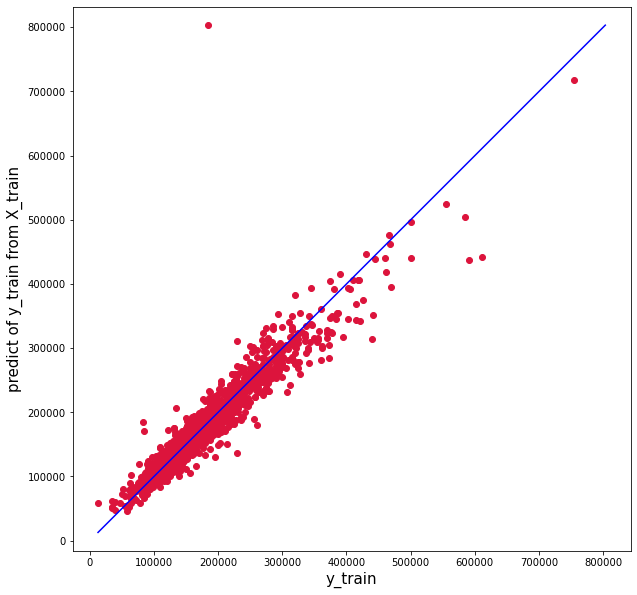

In [159]:
#y train40 vs predicted y from X train40 using our model:

plt.figure(figsize=(10,10))
plt.scatter(np.exp(y_train40),np.exp(gs.predict(X_train40)),c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(np.exp(gs.predict(X_train40))), max(np.exp(y_train40)))
p2 = min(min(np.exp(gs.predict(X_train40))), min(np.exp(y_train40)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_train', fontsize=15)
plt.ylabel('predict of y_train from X_train', fontsize=15)
plt.axis('equal')
plt.show()

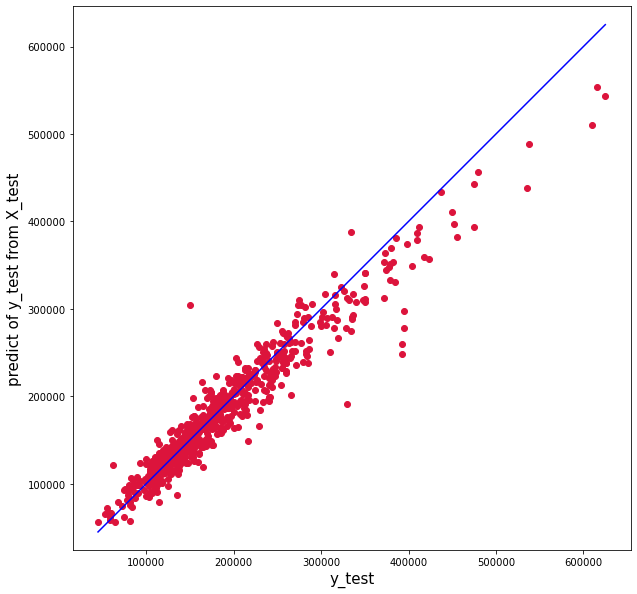

In [161]:
#y test40 vs predicted y from X40 test using our model:

plt.figure(figsize=(10,10))
plt.scatter(np.exp(y_test40),np.exp(gs.predict(X_test40)),c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(np.exp(gs.predict(X_test40))), max(np.exp(y_test40)))
p2 = min(min(np.exp(gs.predict(X_test40))), min(np.exp(y_test40)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_test', fontsize=15)
plt.ylabel('predict of y_test from X_test', fontsize=15)
plt.axis('equal')
plt.show()

In [163]:
ML_df_x.GarageYrBlt.dtype, ML_df_x.GarageYrBlt

(dtype('float64'),
 1      1939.0
 2      1984.0
 3      1930.0
 4      1940.0
 5      2001.0
         ...  
 759    1916.0
 760    1955.0
 761    1949.0
 762    2000.0
 763    1993.0
 Name: GarageYrBlt, Length: 2580, dtype: float64)